In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Outline 

* sklearn 
    * StandardScaler
    * Train-test split and K-fold cross validation
    * One-hot Encoder
    * Multivariate linear regression
* Q&A on HW3

## Normalize your dataset using sklearn

In [49]:
import pandas as pd
data=pd.read_csv("wines.csv")
data.head()

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
2,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.20,1.08,2.85,1045,1,1
3,14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5.00,1.17,2.82,1280,1,1
4,13.75,1.73,2.41,16.0,89,2.6,2.76,0.29,1.81,5.60,1.15,2.90,1320,1,1


In HW2, we normalize our data by our own code. This is how I did it:

In [50]:
df=data
feats=df.drop(['Start assignment','ranking'],axis=1)
rankings=df['ranking']
avg=np.average(feats,axis=0)
std=np.std(feats,axis=0)
feats=feats-avg
feats=feats/std
feats

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
2,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
3,1.382733,-0.768712,-0.170035,-0.809251,-0.332922,-0.152402,0.402320,-0.820719,-0.036617,-0.025128,0.932531,0.294232,1.697675
4,0.925685,-0.544297,0.158946,-1.049479,-0.754202,0.488531,0.733629,-0.578985,0.383884,0.234414,0.844785,0.407228,1.825055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.493343,2.031997,1.803849,1.653086,0.860705,-0.504914,-1.073511,-0.740141,-0.842575,1.488867,-1.261138,-0.976966,-0.372246
174,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
175,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
176,1.395086,1.583165,1.365208,1.502943,-0.262708,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


But we can also do it through the sklearn package using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) funtion

In [51]:
from sklearn.preprocessing import StandardScaler

x=data.drop(["Start assignment","ranking"],axis=1).values
y=data['ranking'].values
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)
x_norm


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.29570023,  0.22769377,  1.84040254, ...,  0.36217728,
         0.44960118, -0.03787401],
       [ 2.25977152, -0.62508622, -0.7183361 , ...,  0.53767082,
         0.33660575,  0.94931905],
       ...,
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041],
       [-0.92721209, -0.54429654, -0.90110314, ...,  0.18668373,
         0.78858745, -0.7543851 ]])

## Train-test split and K-fold cross validation
Documentation for [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)<br>
Split our dataset into train and test

In [52]:
import sklearn.model_selection as skl_model
train_feat,test_feat,train_ranking,test_ranking=skl_model.train_test_split(x_norm, y, test_size=0.2)

In [53]:
print(f'{len(train_ranking)} wines for training and {len(test_ranking)} for testing')

142 wines for training and 36 for testing


Documentation on [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [54]:
kf = skl_model.KFold(n_splits = 3, shuffle = True)
kf

KFold(n_splits=3, random_state=None, shuffle=True)

In [55]:
for train_index, test_index in kf.split(x_norm):
    print('Train: ', train_index, "Test: ", test_index)
    x_train, x_test = x_norm[train_index], x_norm[test_index]
    y_train, y_test = y[train_index], y[test_index]

Train:  [  0   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  23  24  25  26  27  28  31  32  33  34  36  39  40  41  42  43
  44  46  48  49  51  53  54  55  56  57  58  62  64  65  67  68  69  71
  73  76  77  78  79  80  82  83  85  89  92  93  94  95  96  97 100 101
 103 104 105 108 109 112 113 115 117 118 120 122 123 128 131 132 139 140
 141 142 143 144 146 147 148 149 150 151 153 155 156 157 158 159 160 162
 164 165 167 169 171 172 173 174 175 176] Test:  [  1   2  22  29  30  35  37  38  45  47  50  52  59  60  61  63  66  70
  72  74  75  81  84  86  87  88  90  91  98  99 102 106 107 110 111 114
 116 119 121 124 125 126 127 129 130 133 134 135 136 137 138 145 152 154
 161 163 166 168 170 177]
Train:  [  1   2   3   5   7   8  11  15  17  18  19  20  22  23  24  25  26  28
  29  30  31  33  35  37  38  43  44  45  46  47  49  50  52  55  56  57
  59  60  61  62  63  64  66  67  70  72  74  75  78  79  81  84  86  87
  88  89  90  91  93  94  95  96 

Framework for doing K-fold cross validation

In [56]:
def Kfold(k,Xs,ys):
    # The total number of examples for training the network
    total_num=len(Xs)
    # Built in K-fold function in Sci-Kit Learn
    kf=skl_model.KFold(n_splits=k,shuffle=True)
    
    # kf.split: Generate indices to split data into training and test set.
    for train_selector,test_selector in kf.split(range(total_num)):
        # Decite training examples and testing examples for this fold
        train_Xs=Xs[train_selector]
        test_Xs=Xs[test_selector]
        train_ys=ys[train_selector]
        test_ys=ys[test_selector]
        
        val_array=[]
        # Split training examples further into training and validation
        train_in,val_in,train_real,val_real=skl_model.train_test_split(train_Xs,train_ys)
        
        # Fit the data to your model
        # Train the model on your data
        ...
        model = LinearRegression()  # Tutorial
        model.init()                # Tutorial
        for _ in range(max_epoch):
            # Train model on a number of epochs, and test performance in the validation set
            ...
            error = model.fit(train_in)      # Tutorial
            model.update()                   # Tutorial
            val_error = model(val_in)        # Tutorial
            val_array.append(val_error)      # Tutorial
        
        best_idx = np.argmin(val_array)      # Tutorial

        # Report result for the fold with minimum error in validation set
        train_error=model.evaluate(train_Xs,train_ys)
        test_error=model.evaluate(test_Xs,test_ys)
        print("Train error:",train_error)
        print("Test error:",test_error)
        

L. Prechelt, "Early Stopping -- but when?", Neural Networks: Tricks of the trade. Springer, Berlin, Heidelberg, 1998. 55-69.
[Link](https://link.springer.com/content/pdf/10.1007%2F978-3-642-35289-8_5.pdf)

## One hot Encoder

Let's pretend for a  minute that in our wine dataset ranks and start assignments are not labels but 2 categorical features, and we want to use one-hot encoders to describe them 

Split the features into categorical features and continuous features, 

In [57]:
categorical_feats=df[['Start assignment','ranking']]
continuous_feats=x_norm

Use [one-hot encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to transform the categorical features

In [58]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(categorical_feats)
input_cate_feats = encoder.transform(categorical_feats).toarray()
input_cate_feats.shape

(178, 6)

Then you can stack categorical and continuous features together for prediction

In [59]:
feats = np.hstack((continuous_feats, input_cate_feats))     # input is a tuple of 2 arrays  ([], [])
feats.shape

(178, 19)

Similarly, we can use one-hot encoders to encode the output

In [60]:
output_encoder=OneHotEncoder()
y = np.array(df['ranking']).reshape(-1,1)
output_encoder.fit(y)
print(output_encoder.transform(y).toarray())

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

Then we can decode the prediction

In [61]:
output_encoder.inverse_transform([[0,1,0]])

array([[2]])

## Multivariate linear regression

Let's try regression of function
$$f(x,y)=3x+2y-5$$

In [62]:
def generate_X(number):
    xs=(np.random.random(number)*2-1)*10
    ys=(np.random.random(number)*2-1)*10
    return np.hstack([xs.reshape(-1,1),ys.reshape(-1,1)])
    
def generate_data(number,stochascity=0.05):
    X=generate_X(number)
    xs=X[:,0]
    ys=X[:,1]
    fs=3*xs+2*ys-5
    stochastic_ratio=(np.random.random(number)*2-1)*stochascity+1
    return X,fs*stochastic_ratio

<IPython.core.display.Javascript object>


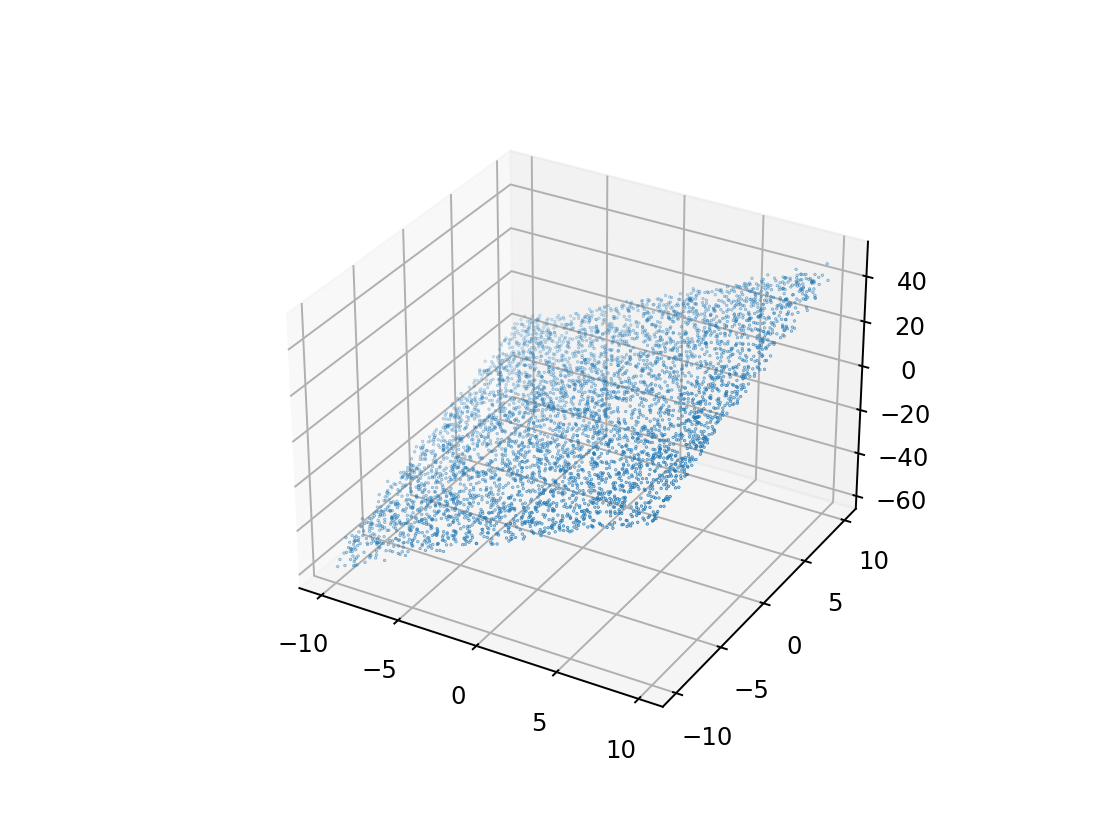

In [67]:
%matplotlib widget
x,y=generate_data(5000,0.1)
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(x[:,0],x[:,1],y,s=0.1)

In [64]:
from sklearn.linear_model import LinearRegression
X,y=generate_data(1000)
reg=LinearRegression()
reg.fit(X, y)
print(reg.score(X,y))
print(reg.coef_,reg.intercept_)

0.9991957201737518
[2.996998   1.99210315] -4.986398967389546


<IPython.core.display.Javascript object>


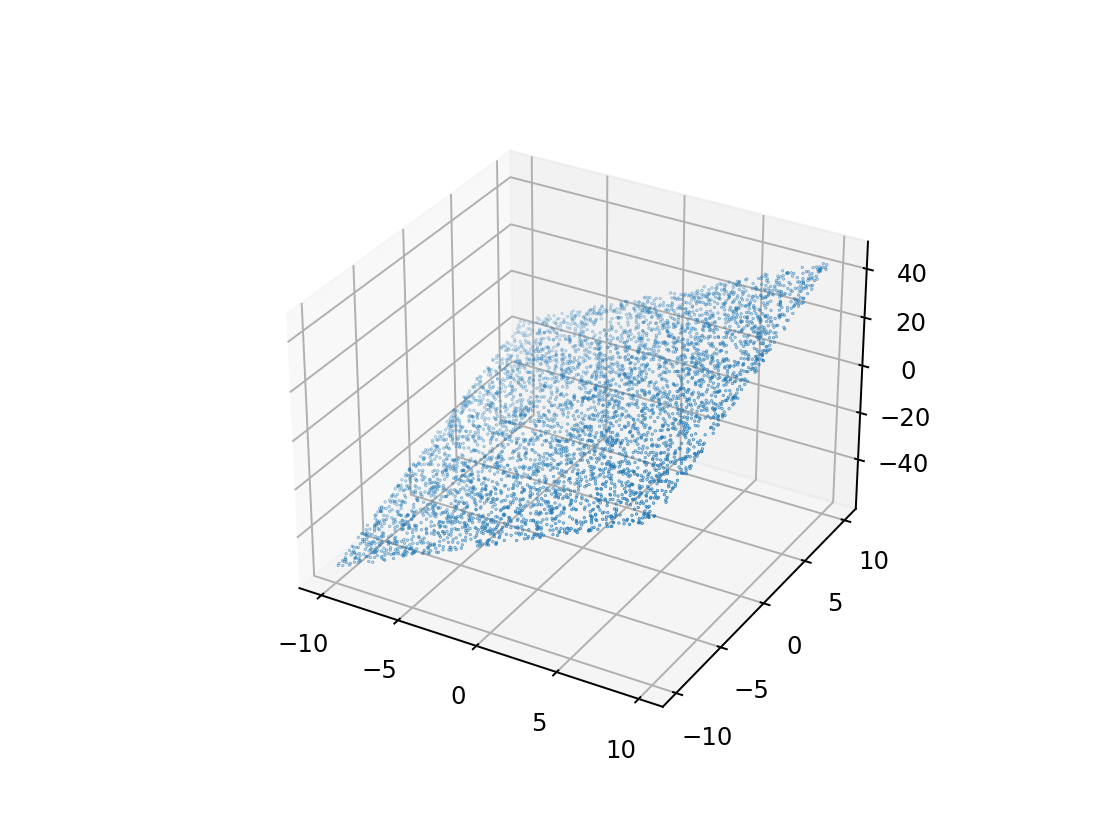

In [68]:
X=generate_X(5000)
y=reg.predict(X)
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],y,s=0.1)